## Observations and Insights 

Based on these data, the Capomulin drug regimen is one of the most successful. Mice on the Capomulin regimen had the second-lowest average and median tumor volumes of the mice in the study. For these mice on the Capomulin regimen, tumor volume and average weight are positively correlated (as mouse weight increases, so does tumor volume). Examining tumor volume over time in one mouse treated with Capomulin indicates that the treatment is effective in reducing tumor volume between the first and last timepoints. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how= "left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice (starting with 249 unique IDs)
combined_data["Mouse ID"].value_counts(normalize=True)

g989    0.006867
a275    0.005283
k210    0.005283
q787    0.005283
o926    0.005283
          ...   
v199    0.000528
n482    0.000528
u153    0.000528
l872    0.000528
x226    0.000528
Name: Mouse ID, Length: 249, dtype: float64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df= combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
print(duplicates_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data= combined_data[combined_data["Mouse ID"] == "g989"].index

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(dup_data, inplace= True)

In [6]:
# Checking the number of mice in the clean DataFrame (now 248 once duplicate was dropped)
combined_data["Mouse ID"].value_counts(normalize=True)

a275    0.005319
y478    0.005319
q787    0.005319
o926    0.005319
q633    0.005319
          ...   
v199    0.000532
n482    0.000532
u153    0.000532
l872    0.000532
x226    0.000532
Name: Mouse ID, Length: 248, dtype: float64

## Summary Statistics

In [25]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Groupby drug regimen
summary_df= combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]

drug_summary= summary_df.groupby(["Drug Regimen"])

# Assemble the resulting series into a single summary dataframe.
drug_group_mean= drug_summary.mean()
drug_group_mean= drug_group_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Vol (mm3)"})
drug_group_mean

,Average Tumor Vol (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_median= drug_summary.median()
drug_group_median= drug_group_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Vol (mm3)"})

drug_group_var= drug_summary.var()
drug_group_var= drug_group_var.rename(columns={"Tumor Volume (mm3)": "Variance in Tumor Vol"})

drug_group_std= drug_summary.std()
drug_group_std= drug_group_std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation in Tumor Vol (mm3)"})

drug_group_sem= drug_summary.sem()
drug_group_sem= drug_group_sem.rename(columns={"Tumor Volume (mm3)": "Standard Error of Mean"})

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_final= pd.concat([drug_group_mean, drug_group_median, drug_group_var, drug_group_std, drug_group_sem], axis= 1)
drug_group_final

,Average Tumor Vol (mm3),Median Tumor Vol (mm3),Variance in Tumor Vol,Standard Deviation in Tumor Vol (mm3),Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Find uniques
bar_graph_df= combined_data[["Mouse ID", "Drug Regimen"]]
bar_data= bar_graph_df.groupby("Drug Regimen").nunique()
del bar_data["Drug Regimen"]
bar_data

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


In [10]:
# Set variables
bar_data["Drug Regimen"]= bar_data.index
total_mice= bar_data["Mouse ID"]
drug_regimen= bar_data["Drug Regimen"]

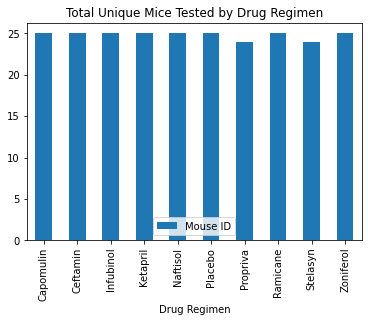

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_data.plot(kind="bar", title="Total Unique Mice Tested by Drug Regimen")


Text(0.5, 1.0, 'Total Unique Mice Tested by Drug Regimen')

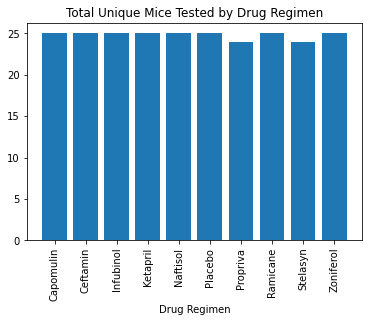

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot
plt.bar(drug_regimen, total_mice, align="center")
plt.xlabel("Drug Regimen")
tick_loc= [value for value in drug_regimen]
plt.xticks(tick_loc, drug_regimen, rotation="vertical")
plt.title("Total Unique Mice Tested by Drug Regimen")

In [13]:
# Find uniques
pie_plot_df= combined_data[["Mouse ID", "Sex"]]
pie_data= pie_plot_df.groupby("Sex").nunique()
del pie_data["Sex"]

In [14]:
# Set variables
pie_data["Sex"]= pie_data.index
mouse_sex= pie_data["Sex"]
mouse_total= pie_data["Mouse ID"]

Text(0.5, 1.0, 'Number of Male vs. Female Mice')

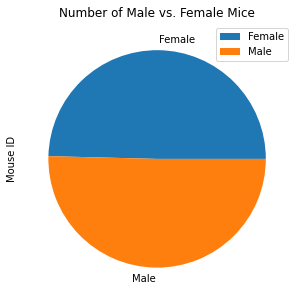

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data.plot(kind="pie", y= "Mouse ID", figsize= (5,5))
plt.title("Number of Male vs. Female Mice")

Text(0.5, 1.0, 'Number of Male vs. Female Mice')

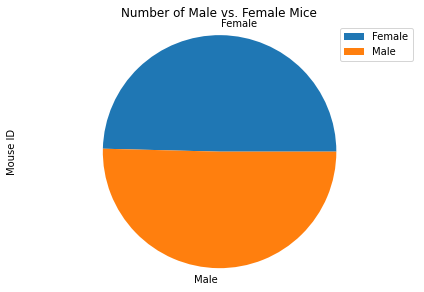

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_total, labels= mouse_sex)
plt.legend (labels= mouse_sex, loc="upper right")
plt.axis("equal")
plt.ylabel("Mouse ID")
plt.tight_layout()
plt.title("Number of Male vs. Female Mice")

## Quartiles, Outliers and Boxplots

In [17]:
max_timepoint = combined_data.groupby(["Mouse ID"]).max()["Timepoint"]

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Dataframe with top 4 (Capomulin, Ramicane, Infubinol, and Ceftamin)
cap_df= combined_data.loc[combined_data["Drug Regimen"]== "Capomulin",:]
ram_df= combined_data.loc[combined_data["Drug Regimen"]== "Ramicane",:]
inf_df= combined_data.loc[combined_data["Drug Regimen"]== "Infubinol",:]
cef_df= combined_data.loc[combined_data["Drug Regimen"]== "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Capomulin
cap_max= cap_df.groupby("Mouse ID").max()["Timepoint"]
cap_max_df= pd.DataFrame(cap_max)
cap_merge_df= pd.merge(cap_max_df, combined_data, on=("Mouse ID", "Timepoint"), how= "left")

# Ramicane
ram_max= ram_df.groupby("Mouse ID").max()["Timepoint"]
ram_max_df= pd.DataFrame(ram_max)
ram_merge_df= pd.merge(ram_max_df, combined_data, on=("Mouse ID", "Timepoint"), how= "left")

# Infubinol
inf_max= inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_max_df= pd.DataFrame(inf_max)
inf_merge_df= pd.merge(inf_max_df, combined_data, on=("Mouse ID", "Timepoint"), how= "left")

# Ceftamin
cef_max= cef_df.groupby("Mouse ID").max()["Timepoint"]
cef_max_df=pd.DataFrame(cef_max)
cef_merge_df= pd.merge(cef_max_df, combined_data, on=("Mouse ID", "Timepoint"), how= "left")

cap_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []
            
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
    
# Locate the rows which contain mice on each drug and get the tumor volumes
cap_tumor_vol= cap_merge_df["Tumor Volume (mm3)"]
ram_tumor_vol= ram_merge_df["Tumor Volume (mm3)"]
inf_tumor_vol= inf_merge_df["Tumor Volume (mm3)"]
cef_tumor_vol= cef_merge_df["Tumor Volume (mm3)"]

# Capomulin Plot and Outliers
cap_quartiles= cap_tumor_vol.quantile([.25, .5, .75])
cap_lower= cap_quartiles[0.25]
cap_upper= cap_quartiles[0.75]
cap_iqr= cap_upper - cap_lower 
cap_lower_bound= cap_lower - (1.5*cap_iqr)
cap_upper_bound= cap_upper + (1.5*cap_iqr)

print(f"Capomulin outliers may be values below {cap_lower_bound} and above {cap_upper_bound}.")

# Ramicane Plot and Outliers
ram_quartiles= ram_tumor_vol.quantile([.25, .5, .75])
ram_lower= ram_quartiles[0.25]
ram_upper= ram_quartiles[0.75]
ram_iqr= ram_upper - ram_lower 
ram_lower_bound= ram_lower - (1.5*ram_iqr)
ram_upper_bound= ram_upper + (1.5*ram_iqr)

print(f"Ramicane outliers may be values below {ram_lower_bound} and above {ram_upper_bound}.")

# Infubinol Plot and Outliers
inf_quartiles= inf_tumor_vol.quantile([.25, .5, .75])
inf_lower= inf_quartiles[0.25]
inf_upper= inf_quartiles[0.75]
inf_iqr= inf_upper - inf_lower 
inf_lower_bound= inf_lower - (1.5*inf_iqr)
inf_upper_bound= inf_upper + (1.5*inf_iqr)

print(f"Infubinol outliers may bevalues below {inf_lower_bound} and above {inf_upper_bound}.")

# Ceftamin Plot and Outliers
cef_quartiles= cef_tumor_vol.quantile([.25, .5, .75])
cef_lower= cef_quartiles[0.25]
cef_upper= cef_quartiles[0.75]
cef_iqr= cef_upper - cef_lower 
cef_lower_bound= cef_lower - (1.5*cef_iqr)
cef_upper_bound= cef_upper + (1.5*cef_iqr)

print(f"Ceftamin outliers may be values below {cef_lower_bound} and above {cef_upper_bound}.")

Capomulin outliers are values below 20.70456164999999 and above 51.83201549.
Ramicane outliers are values below 17.912664470000003 and above 54.30681135.
Infubinol outliers are values below 36.83290494999999 and above 82.74144559000001.
Ceftamin outliers are values below 25.355449580000002 and above 87.66645829999999.


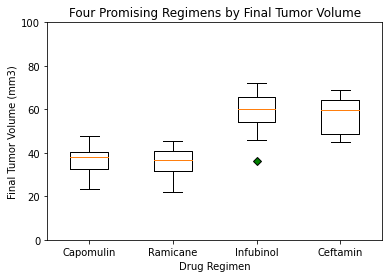

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data= [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]

# Plot
fig1, ax1 = plt.subplots()

# Title and axes labels, y limits
ax1.set_title("Four Promising Regimens by Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ymin= 0
ymax= 100
plt.ylim(ymin, ymax)

# Change outlier color and show plot
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(boxplot_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

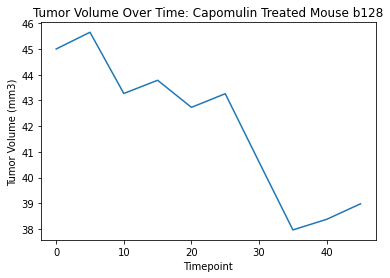

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse_df= combined_data.loc[combined_data["Mouse ID"] == "b128"]

# Set variables 
timepoint = capo_mouse_df["Timepoint"]
tumor_vol= capo_mouse_df["Tumor Volume (mm3)"]

# Plot the tumor volume
tumor_volume_line, = plt.plot(timepoint, tumor_vol)

# Show the chart, add labels
plt.xlabel("Timepoint")
plt.title("Tumor Volume Over Time: Capomulin Treated Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

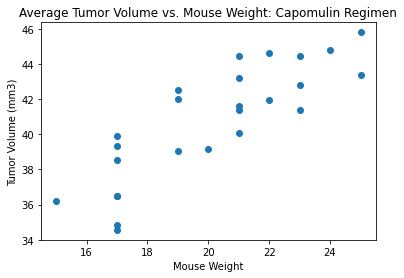

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Set variables
mouse_weight = cap_df.groupby(cap_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol2 = cap_df.groupby(cap_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Plot the variables
plt.scatter(mouse_weight,tumor_vol2)
plt.xlabel("Mouse Weight")
plt.title("Average Tumor Volume vs. Mouse Weight: Capomulin Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

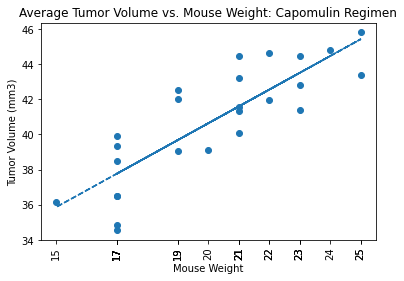

The correlation between mouse weight and tumor volume is 0.84


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set variables (same as above)
mouse_weight = cap_df.groupby(cap_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol2 = cap_df.groupby(cap_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform linear regression on mouse weight and avg tumor volume
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_vol2)
      
# Slope equation
fit = slope * mouse_weight + int

# Plot the line of best fit on top of scatter plot 
plt.scatter(mouse_weight,tumor_vol2)
plt.xlabel("Mouse Weight")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.title("Average Tumor Volume vs. Mouse Weight: Capomulin Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Calculate and print correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_vol2)[0],2)
print(f'The correlation between mouse weight and tumor volume is {corr}')